In [ ]:
'''
Assignment 3: Salary Classification
Dataset: Adult Income
Link: https://raw.githubusercontent.com/selva86/datasets/master/AdultIncome.csv
Task:
 Predict if income > 50K.
 Handle missing values.
 Label encode all categorical variables.
 StandardScaler on numeric columns.
 Train Naive Bayes and compare GaussianNB vs BernoulliNB


'''

In [633]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [634]:
df = pd.read_csv('salary.csv')  ## load the dataset

In [635]:
df  ## show the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [636]:
df.isnull().sum()  ## check null value

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [637]:
## show unique value of each column
for i in range(df.shape[1]):
    print(f'Unique value of {df.columns[i]} is : ',df[df.columns[i]].unique(),'\n\n')

Unique value of age is :  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 


Unique value of workclass is :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


Unique value of fnlwgt is :  [ 77516  83311 215646 ...  34066  84661 257302] 


Unique value of education is :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


Unique value of education-num is :  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 


Unique value of marital-status is :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 


Unique value of occupation is 

In [638]:
df[df['native-country']==' ?']  ## show the row which df['native-country']==' ?'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [639]:
df['native-country'].value_counts()  ## value counts of this column

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [640]:
df['native-country'].mode()  ## mode of this column

0     United-States
Name: native-country, dtype: object

In [641]:
## where df['native-country']==' ?' fill mode of this column
df['native-country'] = np.where(df['native-country']==' ?',df['native-country'].mode(),df['native-country'])

In [642]:
df['native-country'].value_counts()  ## now value counts of this columns

native-country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [643]:
df[df['capital-gain']==0]  ## show where df['capital-gain']==0

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_22400\3756938563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital-gain'])  ## show probability plot of this column
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='capital-gain', ylabel='Density'>

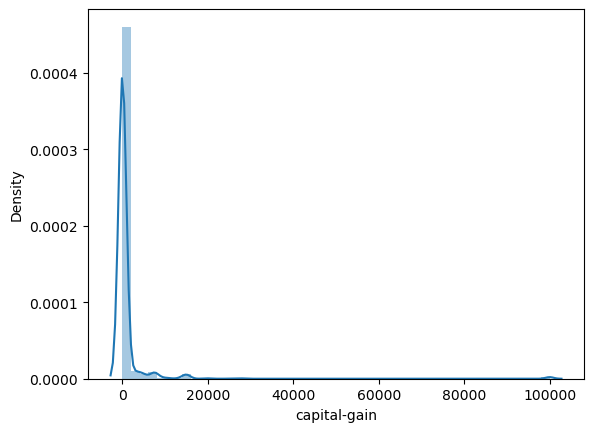

In [644]:
sns.distplot(df['capital-gain'])  ## show probability plot of this column

In [645]:
(df['capital-gain']==0).value_counts() ## count df['capital-gain']==0

capital-gain
True     29849
False     2712
Name: count, dtype: int64

In [646]:
## so here in this column 0 is not missing value

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_22400\531461157.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital-loss'])  ## show probability plot of this column
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='capital-loss', ylabel='Density'>

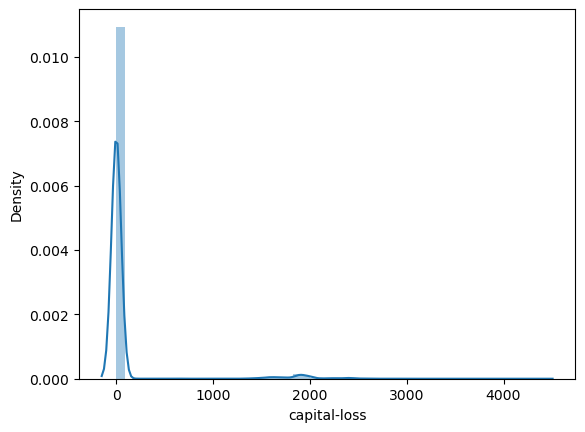

In [647]:
sns.distplot(df['capital-loss'])  ## show probability plot of this column

In [648]:
(df['capital-loss']==0).value_counts()  ## count df['capital-gain']==0

capital-loss
True     31042
False     1519
Name: count, dtype: int64

In [649]:
## so here in this column 0 is not missing value

In [650]:
df['occupation'].value_counts()  ## value counts of this column

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [651]:
## ## where df['occupation']==' ?' fill mode of this column
df['occupation'] = np.where(df['occupation']==' ?',df['occupation'].mode(),df['occupation'])

In [652]:
df['occupation'].value_counts()  ## now again show the value counts of this column

occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [653]:
df['workclass'].value_counts()  ## value countss of this column

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [654]:
## where df['workclass']==' ?' fill mode of this column
df['workclass'] = np.where(df['workclass']==' ?',df['workclass'].mode(),df['workclass'])

In [655]:
df['workclass'].value_counts()  ## now again value counts of this column

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [656]:
## Label encoder --> workclass , marital-status , relationship , race , sex 
## Ordinal encoder --> education, salary
## Scaling --> age , fnlwgt , capital-gain , capital-loss , hours-per-week
## One hot encoder --> occupation , native-country 

In [657]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder, OneHotEncoder, StandardScaler

In [658]:
le = LabelEncoder()  ## create object of label encoder

In [659]:
col1 = ['workclass' , 'marital-status' , 'relationship' , 'race' , 'sex']   ## write the column name whose apply label encoder

In [660]:
df[col1] = df[col1].apply(le.fit_transform)  ## apply label encoder

In [661]:
col2 = ['education', 'salary']  ## write the column name whose apply ordinal encoder

In [662]:
## write unique value of education in a list
cat1 = [' Preschool',' 1st-4th' ,' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th' ,' 12th',' HS-grad',' Some-college', ' Bachelors',' Prof-school',' Assoc-acdm',' Assoc-voc',' Masters',' Doctorate']

In [663]:
## write unique value of salary in a list
cat2 = [' <=50K', ' >50K']

In [664]:
oe = OrdinalEncoder(categories=[cat1,cat2])  ## create object of ordinal encoder

In [665]:
oe.fit(df[col2])  ## fit the ordina encoder

,categories,"[[' Preschool', ' 1st-4th', ...], [' <=50K', ' >50K']]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [666]:
df[col2] = oe.transform(df[col2])  ## transform on ordinal encoder

In [667]:
col3 = ['occupation' , 'native-country']

In [668]:
# Initialize encoder
ohe = OneHotEncoder(sparse_output=False,dtype=np.int64) 

In [669]:
# Fit and transform categorical columns
encoded = ohe.fit_transform(df[col3])

In [670]:
# Create dataframe with new column names
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(col3))

In [671]:
# Combine with original dataframe (drop original categorical columns)
df2 = pd.concat([df.drop(columns=col3), encoded_df], axis=1)

In [672]:
df2.head()  ## show the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,6,77516,10.0,13,4,1,4,1,2174,...,0,0,0,0,0,0,0,1,0,0
1,50,5,83311,10.0,13,2,0,4,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,3,215646,8.0,9,0,1,4,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,3,234721,6.0,7,2,0,2,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,3,338409,10.0,13,2,5,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [673]:
## write the column name whose use one hot encoder
col4 = ['age' , 'fnlwgt' , 'capital-gain' , 'capital-loss' , 'hours-per-week']

In [674]:
df2[col4].corr()  ## correlation between numerical column

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

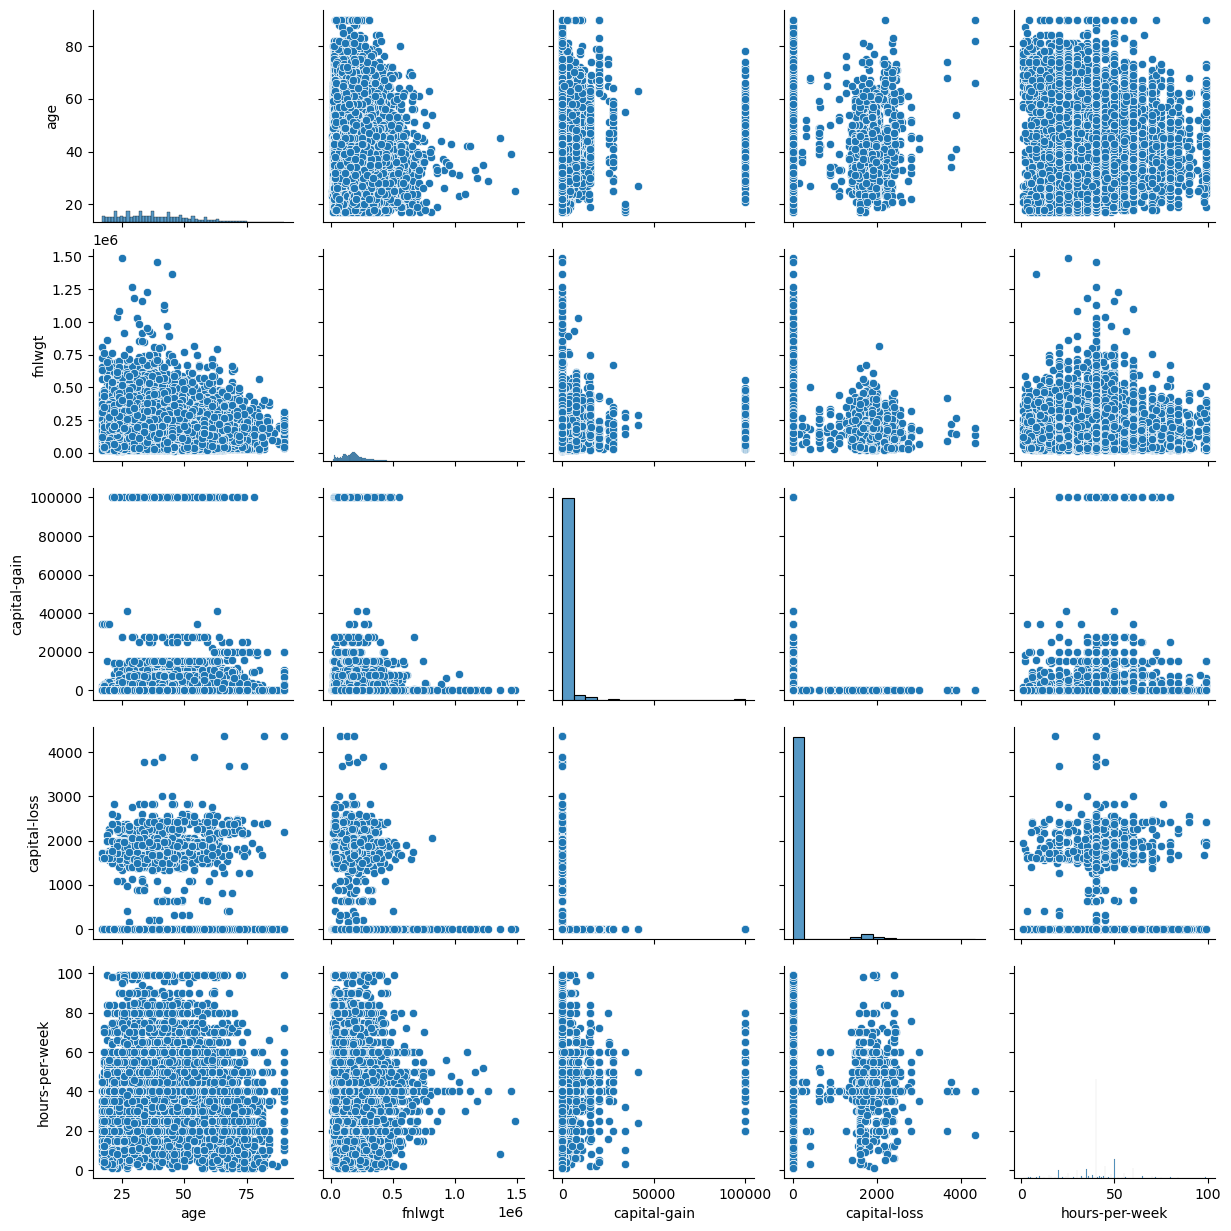

In [675]:
sns.pairplot(df2[col4])  ## pairplot between nuemrical column

In [676]:
from sklearn.model_selection import train_test_split

In [677]:
x = df2.drop(['salary'],axis=1)

In [678]:
y = df2['salary']

In [679]:
x_train , x_test , y_train , y_test= train_test_split(x,y,test_size=0.2)  ## spliting 80% for trainig and 20% for testing

In [680]:
x_tr = x_train.copy()

In [681]:
x_te = x_test.copy()

In [682]:
scaler = StandardScaler()  ## create object of standard scaler

In [683]:
x_train[col4] = scaler.fit_transform(x_train[col4])  ## fit and transform of scaling on x_train
x_test[col4] = scaler.transform(x_test[col4])  ## transform of scaling on x_test

In [684]:
from sklearn.naive_bayes import GaussianNB ,BernoulliNB

In [685]:
gnb = GaussianNB()  ## create object of gaussian naive bayes

In [686]:
bnb = BernoulliNB()  ## create object of bernoulli naive bayes

In [687]:
gnb.fit(x_train , y_train)  ## fit the model on gaussian naive bayes

,priors,None
,var_smoothing,1e-09


In [688]:
y_pred = gnb.predict(x_test)  ## predict the model of gaussian naive bayes

In [689]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [690]:
accuracy_score(y_test,y_pred)  ## accuracy score of gaussian naive bayes

0.4053431598341778

[[1122   66]
 [3807 1518]]


Text(50.722222222222214, 0.5, 'Actual Values')

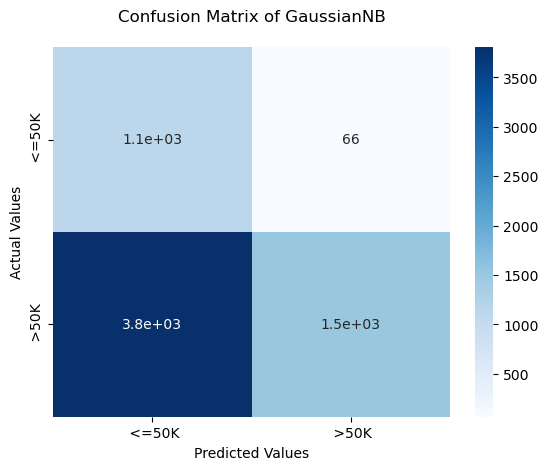

In [691]:
## Confusion matrix of gaussian naive bayes
cm = confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='Blues',yticklabels=[' <=50K', ' >50K'],xticklabels=[' <=50K', ' >50K'])
plt.title('Confusion Matrix of GaussianNB\n')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [692]:
print(classification_report(y_test,y_pred)) ## show classification report of gaussian naive bayes

              precision    recall  f1-score   support

         0.0       0.94      0.23      0.37      4929
         1.0       0.29      0.96      0.44      1584

    accuracy                           0.41      6513
   macro avg       0.61      0.59      0.40      6513
weighted avg       0.78      0.41      0.38      6513



In [693]:
## binning numerical continuous column for bernoulli naive bayes
for i in range(len(col4)):
    x_tr[col4[i]] = (x_tr[col4[i]] > x_tr[col4[i]].mean()).astype(int)

In [694]:
x_tr.head()

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
21138,0,3,0,9.0,10,2,0,4,1,0,...,0,0,0,0,0,0,0,1,0,0
347,0,3,0,13.0,11,0,4,4,0,0,...,0,0,0,0,0,0,0,1,0,0
24988,1,3,0,12.0,12,2,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
13963,1,4,1,10.0,13,2,0,4,1,1,...,0,0,0,0,0,0,0,1,0,0
16512,0,3,0,8.0,9,2,0,4,1,0,...,0,0,0,0,0,0,0,1,0,0


In [695]:
bnb.fit(x_tr,y_train)  ## fit the model on bernoulli naive byes

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [696]:
y_pred1 = bnb.predict(x_te)  ## predict the model on bernoulli naive bayes

In [697]:
accuracy_score(y_test,y_pred1)  ## accuracy score of bernoulli naive bayes

0.7329955473668048

[[3534 1395]
 [ 344 1240]]


Text(50.722222222222214, 0.5, 'Actual Values')

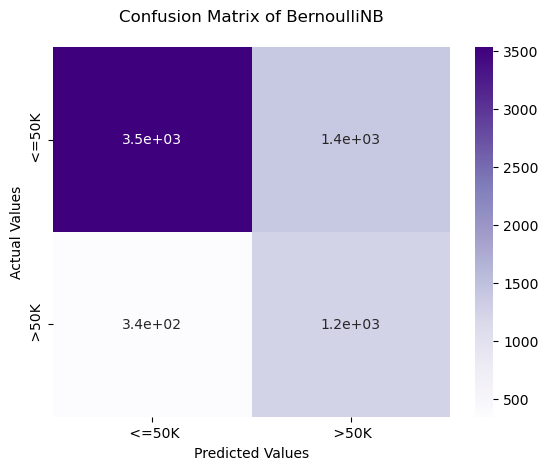

In [698]:
## confusion matrix of bernoulli naive bayes
cm = confusion_matrix(y_test,y_pred1)
print(cm)
sns.heatmap(cm,annot=True,cmap='Purples',yticklabels=[' <=50K', ' >50K'],xticklabels=[' <=50K', ' >50K'])
plt.title('Confusion Matrix of BernoulliNB\n')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [699]:
print(classification_report(y_test,y_pred1))  ## classification report of bernoulli naive bayes

              precision    recall  f1-score   support

         0.0       0.91      0.72      0.80      4929
         1.0       0.47      0.78      0.59      1584

    accuracy                           0.73      6513
   macro avg       0.69      0.75      0.70      6513
weighted avg       0.80      0.73      0.75      6513



In [ ]:
'''

** Why BernoulliNB performed better than MultinomialNB?

        1. After encoding, most features became binary (0/1).
        2. BernoulliNB is designed for binary feature presence, which matches the data structure.
        3. MultinomialNB expects frequency counts, which are absent in salary datasets.
        4. Hence, BernoulliNB aligns better with the data distribution and feature representation.


'''

In [ ]:
'''

Conclusion :

        1. Multinomial Naive Bayes performed poorly (41% accuracy) because its assumptions do not match the encoded salary dataset.
        2. It showed extreme class bias and failed to generalize well.
        3. Bernoulli Naive Bayes achieved 73% accuracy, showing strong improvement.
        4. BernoulliNB handled binary encoded features effectively.
        5. The results confirm that model selection must match data representation.
        6. Bernoulli Naive Bayes is more suitable than Multinomial Naive Bayes for this Salary Classification problem.

'''